In [1]:
from utils import *
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

In [2]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}
rc('font', **font)

In [3]:
def barplot(experiments, experiment_names, category, bar_width, figsize, legend=True):
    if category == 'GLOPs':
        category_label = 'GFLOPs'
    elif category == 'Cycles':
        category_label = 'Cycles (Mega)'
    else:
        category_label = category
        

    hatches = ["*", "x", "+", ".", "/", "-", "|"]

    assert len(experiments) == len(experiment_names)
    assert len(experiments) <= len(hatches)

    layer_names = ['Layer {}'.format(i + 1) for i in range(len(experiments[0]))]

    values = []
    for _ in range(len(experiments)):
        values.append([])

    # values is `experiments` long
    for e, exp in enumerate(experiments):
        for layer_stats in exp:
            if category == 'Cycles':
                values[e].append(layer_stats[category] / 1e6)
            else:
                values[e].append(layer_stats[category])
                

    rs = [np.arange(len(layer_names))]
    for i in range(1, len(experiments)):
        rs.append([x + bar_width for x in rs[i-1]])
            
    plt.figure(figsize=figsize)

    for e in range(len(experiments)):
        bars = plt.bar(rs[e], values[e], color='silver', width=bar_width, edgecolor='black', linewidth=1.5, label=experiment_names[e])
        for bar in bars.patches:
            bar.set_hatch(hatches[e])

    plt.xticks([r + bar_width for r in range(len(layer_names))], layer_names)
    plt.ylabel(category_label)

    if legend:
        plt.legend()

## Plot 1

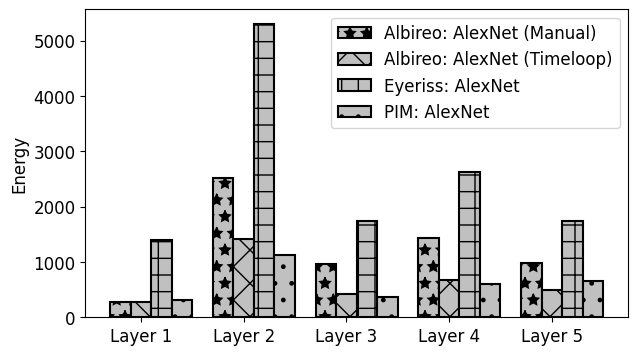

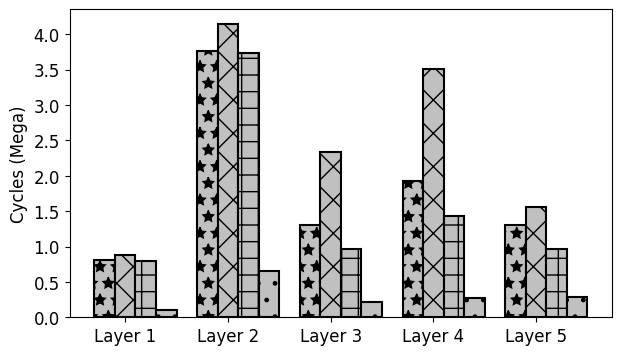

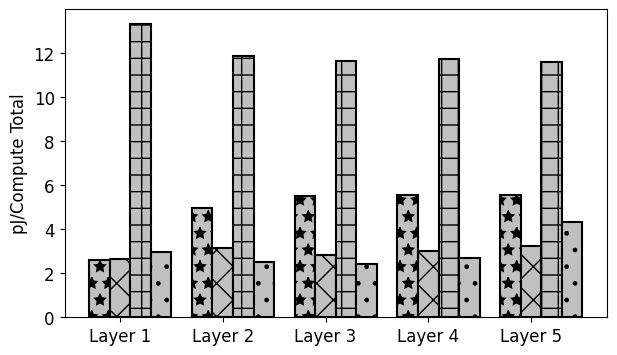

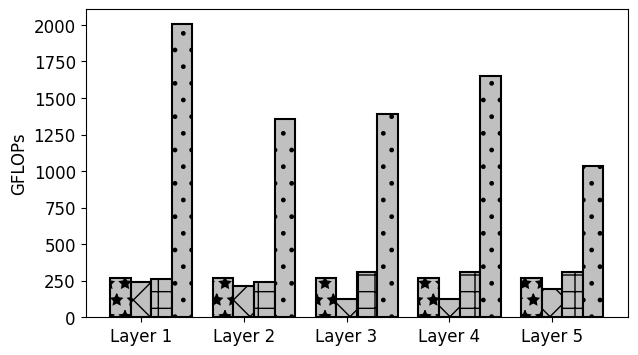

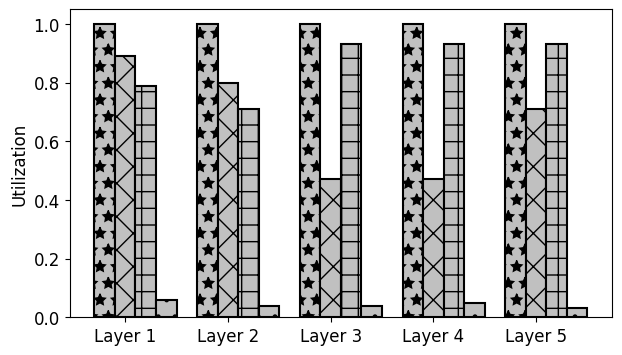

In [4]:
alexnet_manual_9_keep = load_data('../results/alexnet/manual/9_keep/stats.pkl')
alexnet_mapper_9_keep = load_data('../results/alexnet/mapper/9_keep_highertimeout/stats.pkl')
alexnet_mapper_eyeriss = load_data('../results/alexnet_eyeriss/mapper/stats.pkl')
alexnet_mapper_pim = load_data('../results/alexnet_pim/mapper/stats.pkl')

experiments = [
    alexnet_manual_9_keep,
    alexnet_mapper_9_keep,
    alexnet_mapper_eyeriss,
    alexnet_mapper_pim,
]

experiment_names = [
    'Albireo: AlexNet (Manual)',
    'Albireo: AlexNet (Timeloop)',
    'Eyeriss: AlexNet',
    'PIM: AlexNet',
]
categories = ['Energy', 'Cycles', 'pJ/Compute Total', 'GLOPs', 'Utilization']

for i, category in enumerate(categories):
    barplot(experiments, experiment_names, category, bar_width=0.2, figsize=(7, 4), legend=True if not i else False)

## Plot 2

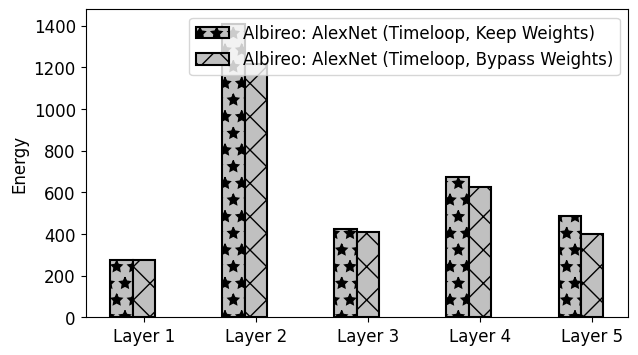

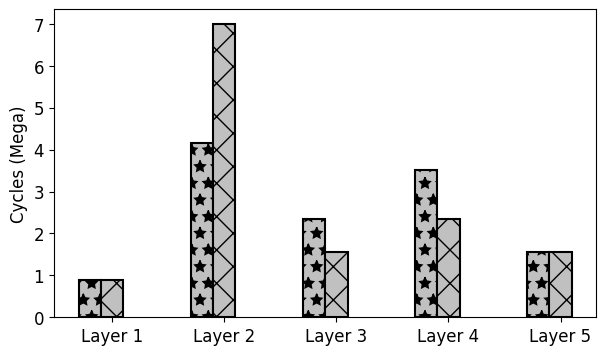

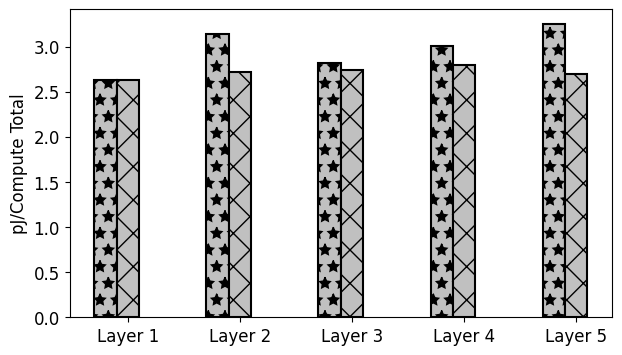

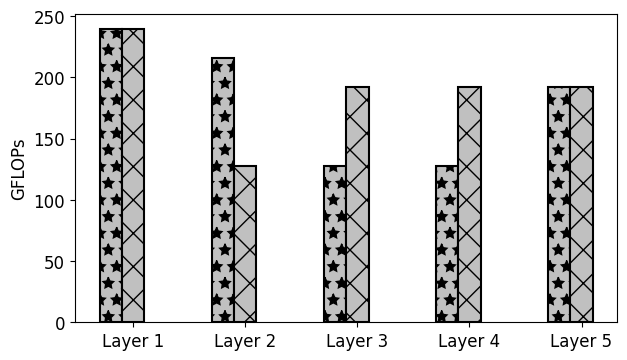

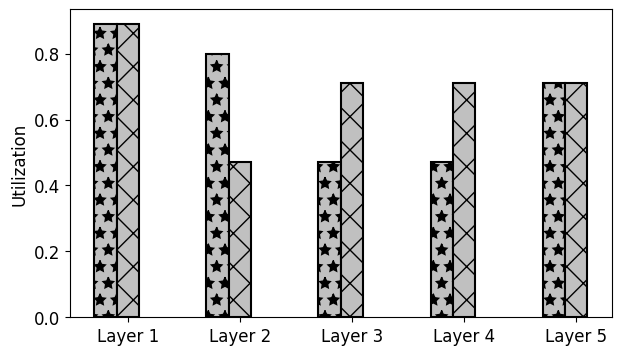

In [5]:
alexnet_mapper_9_keep = load_data('../results/alexnet/mapper/9_keep_highertimeout/stats.pkl')
alexnet_mapper_9_bypass = load_data('../results/alexnet/mapper/9_bypass/stats.pkl')

experiments = [
    alexnet_mapper_9_keep,
    alexnet_mapper_9_bypass,
]

experiment_names = [
    'Albireo: AlexNet (Timeloop, Keep Weights)',
    'Albireo: AlexNet (Timeloop, Bypass Weights)',
]
categories = ['Energy', 'Cycles', 'pJ/Compute Total', 'GLOPs', 'Utilization']

for i, category in enumerate(categories):
    barplot(experiments, experiment_names, category, bar_width=0.2, figsize=(7, 4), legend=True if not i else False)

## Plot 3

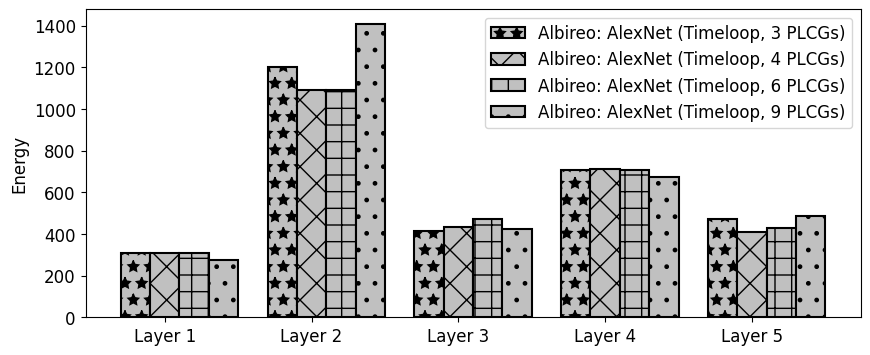

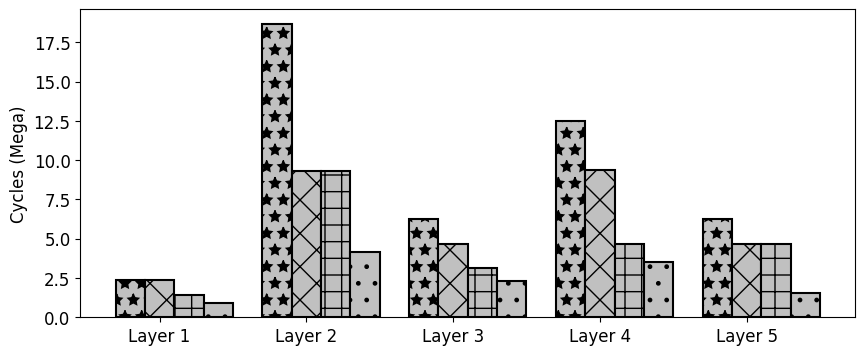

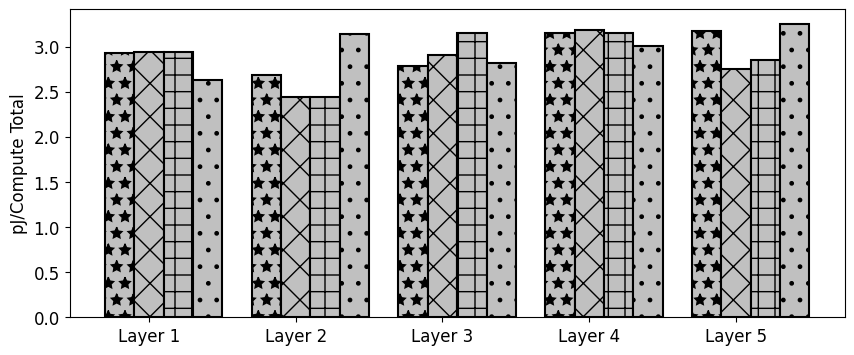

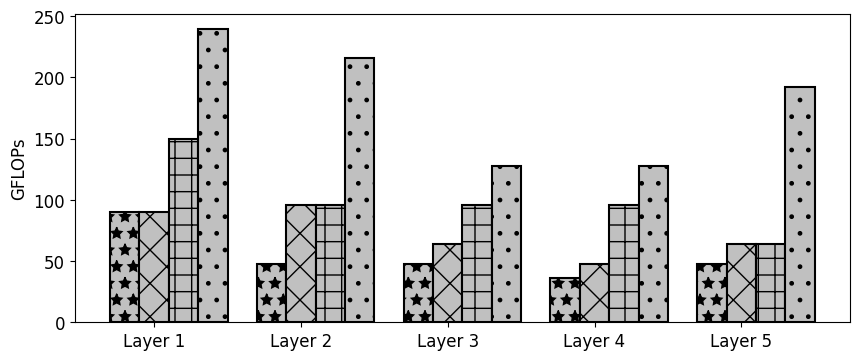

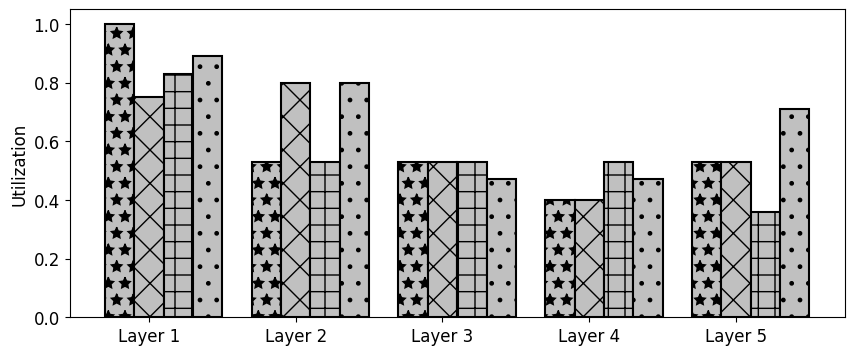

In [6]:
alexnet_mapper_3_keep = load_data('../results/alexnet/mapper/3_keep/stats.pkl')
alexnet_mapper_4_keep = load_data('../results/alexnet/mapper/4_keep/stats.pkl')
alexnet_mapper_6_keep = load_data('../results/alexnet/mapper/6_keep/stats.pkl')
alexnet_mapper_9_keep = load_data('../results/alexnet/mapper/9_keep_highertimeout/stats.pkl')

experiments = [
    alexnet_mapper_3_keep,
    alexnet_mapper_4_keep,
    alexnet_mapper_6_keep,
    alexnet_mapper_9_keep,
]

experiment_names = [
    'Albireo: AlexNet (Timeloop, 3 PLCGs)',
    'Albireo: AlexNet (Timeloop, 4 PLCGs)',
    'Albireo: AlexNet (Timeloop, 6 PLCGs)',
    'Albireo: AlexNet (Timeloop, 9 PLCGs)',
]
categories = ['Energy', 'Cycles', 'pJ/Compute Total', 'GLOPs', 'Utilization']

for i, category in enumerate(categories):
    barplot(experiments, experiment_names, category, bar_width=0.2, figsize=(10, 4), legend=True if not i else False)

## Plot 4

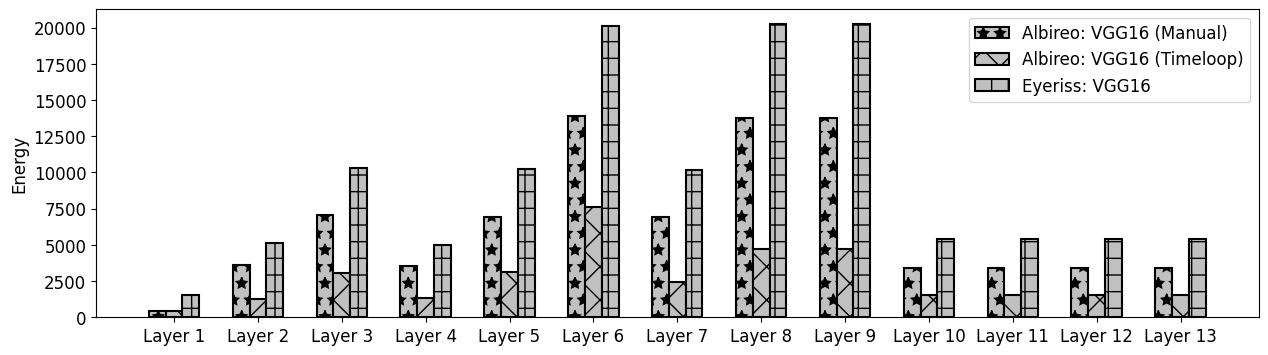

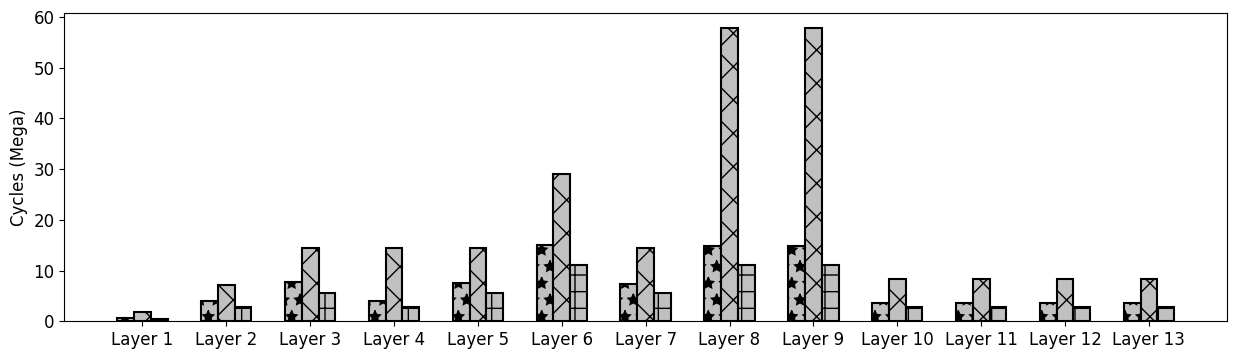

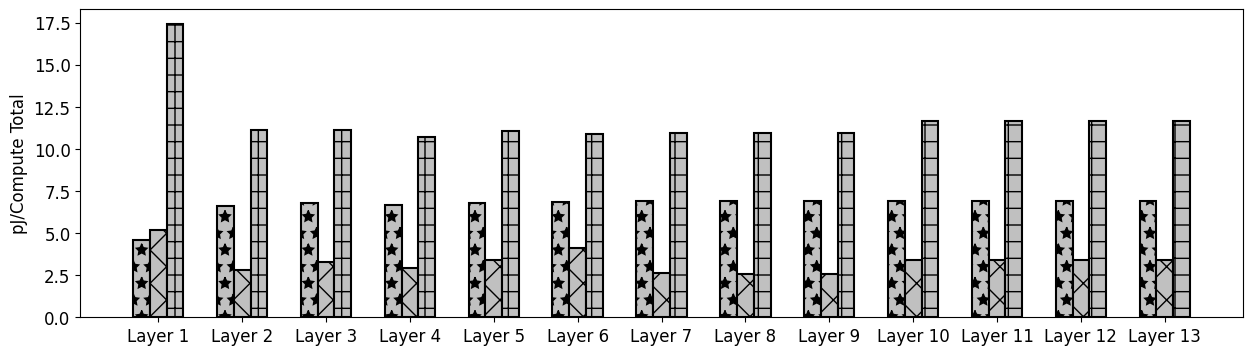

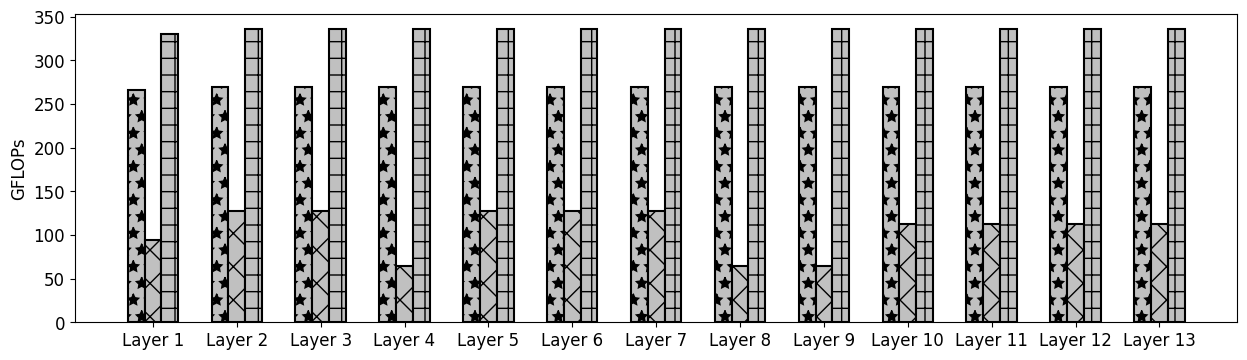

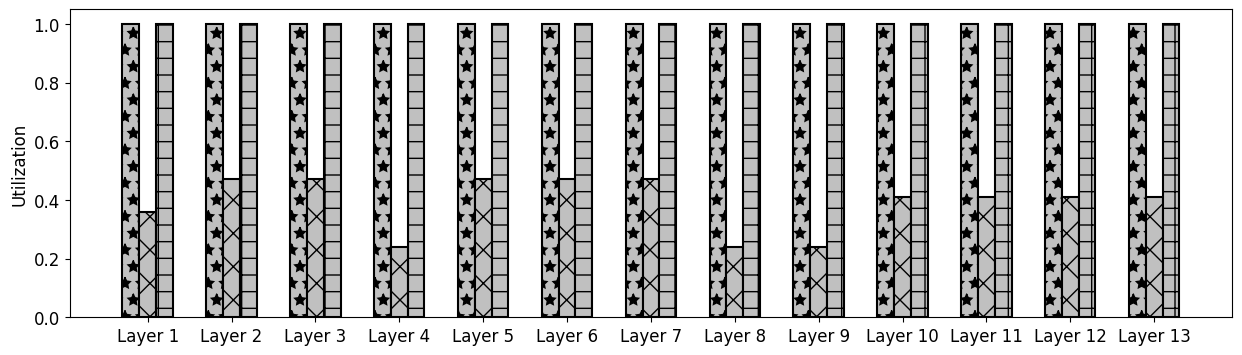

In [7]:
vgg16_manual_9_keep = load_data('../results/vgg16/manual/9_keep/stats.pkl')
vgg16_mapper_9_keep = load_data('../results/vgg16/mapper/9_keep/stats.pkl')
vgg16_mapper_eyeriss = load_data('../results/vgg16_eyeriss/mapper/stats.pkl')


experiments = [
    vgg16_manual_9_keep,
    vgg16_mapper_9_keep,
    vgg16_mapper_eyeriss,
]

experiment_names = [
    'Albireo: VGG16 (Manual)',
    'Albireo: VGG16 (Timeloop)',
    'Eyeriss: VGG16',
]
categories = ['Energy', 'Cycles', 'pJ/Compute Total', 'GLOPs', 'Utilization']

for i, category in enumerate(categories):
    barplot(experiments, experiment_names, category, bar_width=0.2, figsize=(15, 4), legend=True if not i else False)

In [8]:
# raw_data = load_data('../results/alexnet_eyeriss/mapper/raw.pkl')



# all_stats = []

# for i, (stats, loop) in enumerate(raw_data):
#     all_stats.append(get_numbers_from_summary_eyeriss(stats[stats.find("Summary Stats"):]))

# save_data(all_stats, '../results/vgg16_eyeriss/mapper/stats.pkl')





# string = ''

# for i, (stats, loop) in enumerate(raw_data):
#     string += 'Layer {}\n\n'.format(i)
#     string += loop
#     string += '\n\n\n\n'

# with open('../results/vgg16_eyeriss/mapper/loops.txt', 'w') as file:
#     file.write(string)